In [1]:
import argopandas as argo
import seaborn as sns
sns.set(style='ticks', context='paper', palette='colorblind')

# canadian float with suspected fsd
flt = argo.float(4902573)

In [2]:
# get profiles near last profile (100km radius) in 2022
# note 2 aoml profiles look awful (PSAL ~31) so I am removing them
# they're the first two profiles so that's what .iloc[2:] is doing
ix = argo.prof.subset_radius(
    flt.prof.iloc[-1].latitude,
    flt.prof.iloc[-1].longitude,
    100
).subset_date('2022-01').iloc[2:]
ix

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update
577617,aoml/4901702/profiles/R4901702_285.nc,2022-01-31 18:47:00+00:00,41.401,-58.585,A,854,AO,2022-01-31 20:01:04+00:00
2588954,meds/4902515/profiles/R4902515_011.nc,2022-01-06 15:34:00+00:00,40.673,-58.009,A,844,ME,2022-01-06 13:15:48+00:00
2588958,meds/4902515/profiles/R4902515_015.nc,2022-02-16 11:46:00+00:00,41.490,-58.157,A,844,ME,2022-02-16 10:15:49+00:00
2590503,meds/4902573/profiles/R4902573_007.nc,2022-02-17 12:01:00+00:00,40.846,-58.583,A,844,ME,2022-02-17 10:15:49+00:00


In [3]:
df = ix.levels[['PRES', 'TEMP', 'PSAL']]

Reading 4 files


In [4]:
df

PRES    TEMP  \
file                                  N_PROF N_LEVELS                        
aoml/4901702/profiles/R4901702_285.nc 0      0            1.040000  14.611   
                                             1            2.000000  14.613   
                                             2            2.960000  14.612   
                                             3            4.000000  14.610   
                                             4            5.080000  14.614   
...                                                            ...     ...   
meds/4902573/profiles/R4902573_007.nc 0      652       1975.099976   3.727   
                                             653       1985.300049   3.715   
                                             654       1995.199951   3.702   
                                             655       2005.300049   3.695   
                                             656       2016.000000   3.689   

                                                            PSAL  
file                                  N_PROF N_LEVELS             
aoml/4901702/profiles/R4901702_285.nc 0      0         35.264999  
                                             1         35.265999  
                                             2         35.265999  
                                             3         35.265999  
                                             4         35.264000  
...                                                          ...  
meds/4902573/profiles/R4902573_007.nc 0      652       34.891998  
                                             653       34.891998  
                                             654       34.890999  
                                             655       34.890999  
                                             656       34.890999  

[2498 rows x 3 columns]

<AxesSubplot:xlabel='PSAL', ylabel='TEMP'>

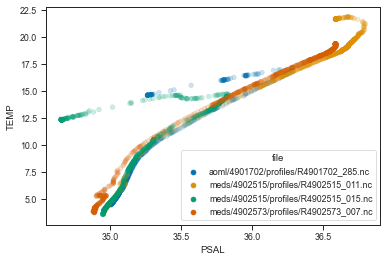

In [5]:
# plot
sns.scatterplot(x='PSAL', y='TEMP', hue='file', data=df, edgecolor=None, alpha=0.2)

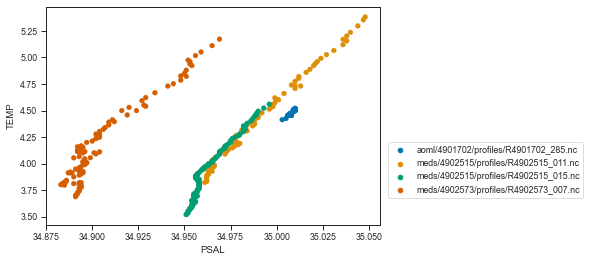

In [6]:
# plot again but focus on deep values
g = sns.scatterplot(x='PSAL', y='TEMP', hue='file', data=df[df.PRES > 1000], edgecolor=None)
# legend in the way, move it
g.legend(bbox_to_anchor = (1.01, 0.4))

Reading 8 files


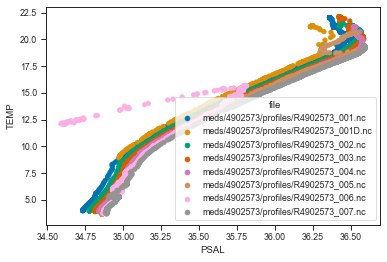

In [13]:
# note - this is actually the saltiest profile from this float, and it is still fresh relative to nearby profiles
# excuse the mismatched color schemes
g = sns.scatterplot(x='PSAL', y='TEMP', hue='file', data=flt.prof.levels[['PRES', 'TEMP', 'PSAL']], edgecolor=None)